# EDA Notebook

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [27]:
# Set a base theme using Seaborn
sns.set_theme(style="whitegrid")

# Customize Matplotlib parameters for a unique look
plt.rcParams.update({
    'axes.facecolor': '#f7f7f7',      # Light gray background for better readability
    'axes.edgecolor': '#333333',      # Dark border around plots
    'axes.grid': True,                # Enable grid lines
    'grid.color': '#e3e3e3',          # Light grid lines
    'grid.alpha': 0.5,                # Semi-transparent grid lines
    'axes.labelcolor': '#333333',     # Dark labels for better contrast
    'xtick.color': '#333333',         # Dark ticks
    'ytick.color': '#333333',         # Dark ticks
    'figure.facecolor': 'white',      # White background for the figure
    'font.size': 12,                  # General font size
    'axes.titlesize': 14,             # Title font size
    'axes.titleweight': 'bold',       # Bold title
    'axes.labelsize': 12,             # Axis label font size
    'axes.labelweight': 'bold',       # Bold axis labels
    'legend.fontsize': 10,            # Font size for legend
    'legend.title_fontsize': 12,      # Font size for legend title
    'legend.frameon': True,           # Frame around legend
    'legend.framealpha': 0.9,         # Slightly transparent legend frame
    'legend.facecolor': '#f0f0f0',    # Light background for legend
    'legend.edgecolor': '#d1d1d1',    # Border color for legend
    'axes.prop_cycle': plt.cycler(color=[
        '#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd'
    ])  # Custom color cycle for a cohesive palette
})

## Data Cleaning

In [28]:
data = pd.read_excel('data/fraud.xlsx')
# Data Cleaning Steps
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['is_fraud'] = data['is_fraud'].astype(str).str.replace('1"2020-12-24 16:56:24"', '1')
data['is_fraud'] = data['is_fraud'].str.replace('0"2019-01-01 00:00:44"', '0')
data['is_fraud'] = data['is_fraud'].astype(int)
data['merchant'] = data['merchant'].str.replace(r'^"|"$', '', regex=True)
data['job'] = data['job'].str.replace(r'^"|"$', '', regex=True)
data = data.drop_duplicates(subset='trans_num', keep='first')
data = data.sort_values(by='trans_date_trans_time')
data['merchant'] = data['merchant'].astype('category')
data['category'] = data['category'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')
data['job'] = data['job'].astype('category')
data['is_fraud'] = data['is_fraud'].astype('category')
data['trans_num'] = data['trans_num'].astype('category')
data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
7781,2019-01-01 00:00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
7782,2019-01-01 00:07:00,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
7783,2019-01-01 00:09:00,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
7784,2019-01-01 00:21:00,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-02-08,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
7785,2019-01-01 00:22:00,Kunze Inc,grocery_pos,90.22,Honokaa,HI,20.0827,-155.4880,4878,Physiotherapist,1966-03-12,95826e3caa9e0b905294c6dae985aec1,19.560013,-156.045889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,2020-12-31 23:57:00,"Larkin, Stracke and Greenfelde",entertainment,46.71,Blairsden-Graeagle,CA,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,38.963543,-120.457121,0
7777,2020-12-31 23:58:00,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
7780,2020-12-31 23:59:00,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0
7778,2020-12-31 23:59:00,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0


## General Analysis

Tidak ada missing value di seluruh Dataset

### Variable Information

Dataset ini memiliki 15 variabel:
- 7 Variabel bertipe Kategori
- 5 Variabel bertipe Float
- 2 Variabel bertipe Datetime
- 1 Variabel bertipe Int

7 Variabel bertipe kategori:
- trans_num (unique identifier): tanda / id transaksi
- is_fraud (target klasifikasi): indikator fraud
- merchant: merchant penjual
- category: kategori barang yang dijual
- city: kota dari pembeli/pemegang kartu kredit
- state: negara pemegang kartu kredit
- job: pekerjaan pemegang kartu kredit


5 Variabel bertipe float:
- amt (target regresi): jumlah / nilai transaksi
- lat (seharusnya bertipe spasial): koordinat geografis pengguna
- long (seharusnya bertipe spasial): koordinat geografis pengguna
- merch_lat (seharusnya bertipe spasial): koordinat geografis merchant
- merch_long (seharusnya bertipe spasial): koordinat geografis merchant


2 Variabel bertie date_time:
- trans_date_trans_time: Waktu dan tanggal transaksi.
- dob: Tanggal lahir pengguna

1 Variabel bertipe Int:
- city_pop: Populasi kota pengguna


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14383 entries, 7781 to 7779
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  category      
 2   category               14383 non-null  category      
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  category      
 5   state                  14383 non-null  category      
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  category      
 10  dob                    14383 non-null  datetime64[ns]
 11  trans_num              14383 non-null  category      
 12  merch_lat              14383 non-null  float64       
 13  merc

In [10]:
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
7781,2019-01-01 00:00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
7782,2019-01-01 00:07:00,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
7783,2019-01-01 00:09:00,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
7784,2019-01-01 00:21:00,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-02-08,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
7785,2019-01-01 00:22:00,Kunze Inc,grocery_pos,90.22,Honokaa,HI,20.0827,-155.4880,4878,Physiotherapist,1966-03-12,95826e3caa9e0b905294c6dae985aec1,19.560013,-156.045889,0


### Missing Value

c:\ProgramData\anaconda3\envs\gelar_rasa\Lib\site-packages\scipy\cluster\hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


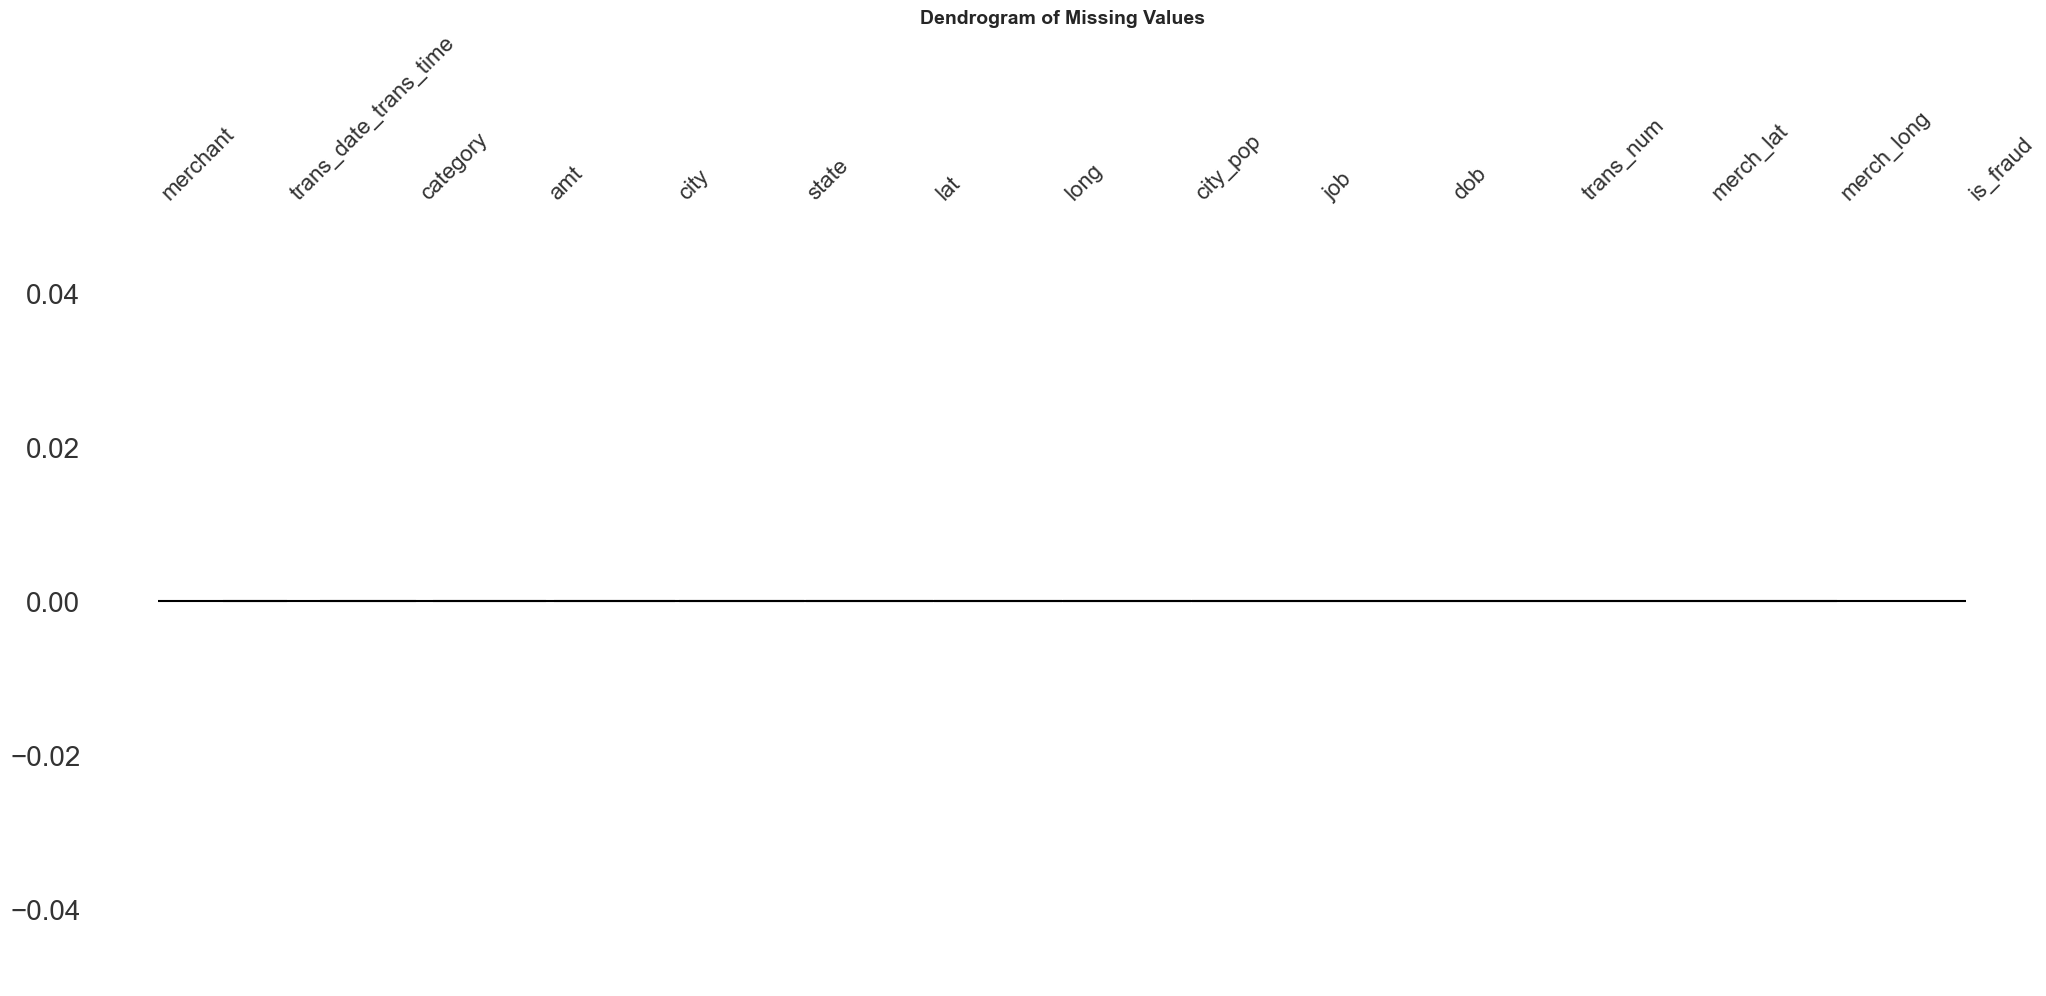

In [29]:
msno.dendrogram(data)
plt.title('Dendrogram of Missing Values')
plt.show()

# Univariate Analysis

### Numerical Variables

#### Outlier Detection

In [47]:
np.log10(10)

1.0

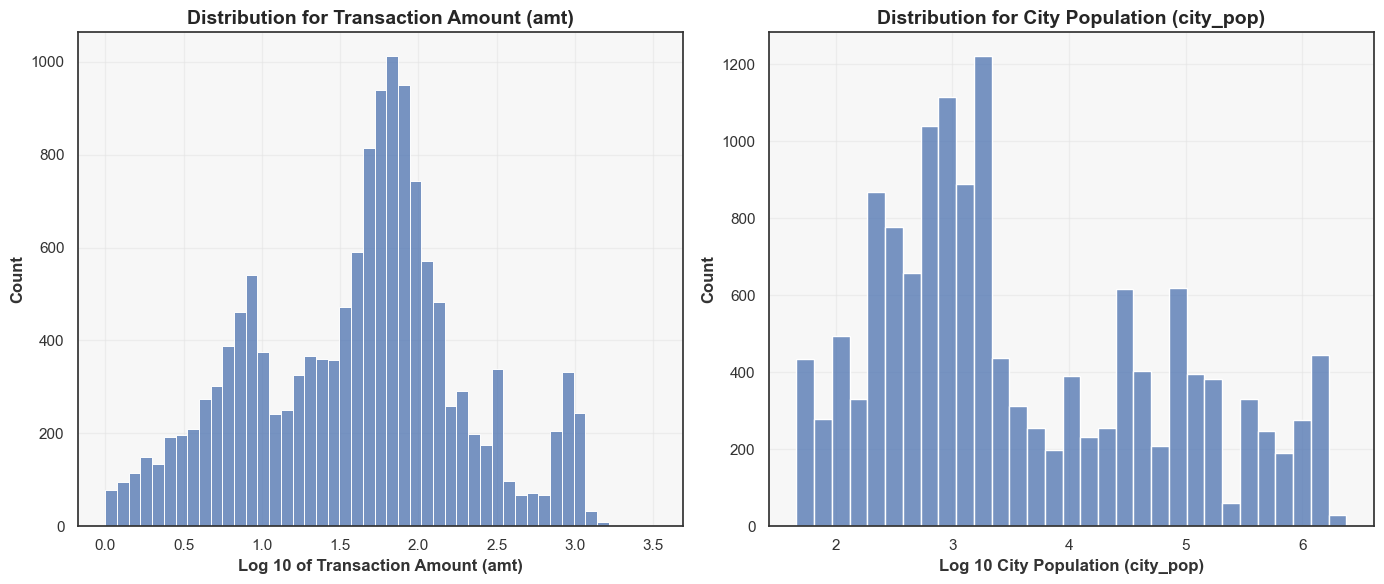

In [52]:
# Set up the figure for visualizing outliers in 'amt' and 'city_pop'
plt.figure(figsize=(14, 6))

# Plot for 'amt' outliers
plt.subplot(1, 2, 1)
sns.histplot(np.log10(data['amt']))
plt.title('Distribution for Transaction Amount (amt)')
plt.xlabel('Log 10 of Transaction Amount (amt)')

# Plot for 'city_pop' outliers
plt.subplot(1, 2, 2)
sns.histplot(np.log10(data['city_pop']))
plt.title('Distribution for City Population (city_pop)')
plt.xlabel('Log 10 City Population (city_pop)')

plt.tight_layout()
plt.show()


### Categorical Variables

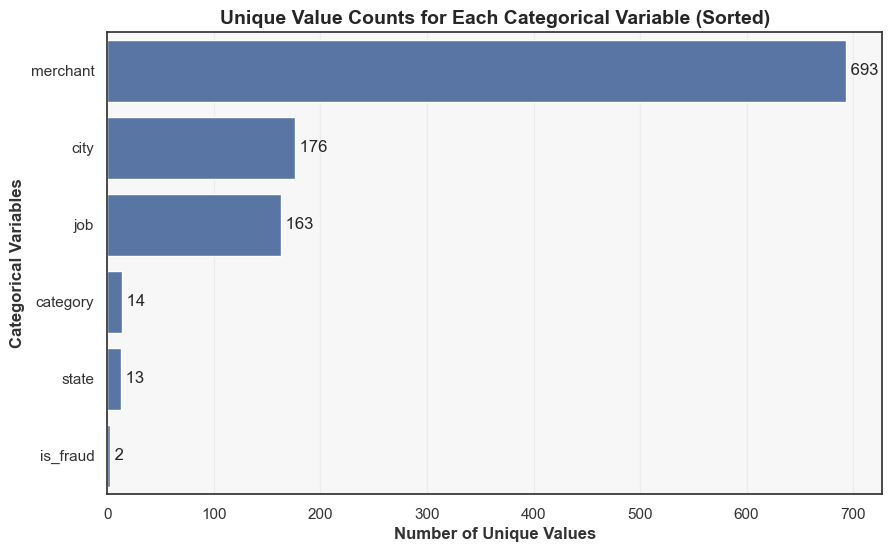

In [33]:
categorical_columns = ['merchant', 'category', 'city', 'state', 'job', 'is_fraud']

# First, gather unique value counts for each categorical variable
unique_value_counts = {col: data[col].nunique() for col in categorical_columns}

# Convert this info into a DataFrame for easier plotting
unique_value_counts_df = pd.DataFrame(list(unique_value_counts.items()), columns=['Category', 'Unique Values'])

unique_value_counts_df = unique_value_counts_df.sort_values(by='Unique Values', ascending=False)

# Plot unique value counts with labels next to each bar (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_value_counts_df, x='Unique Values', y='Category')
for index, value in enumerate(unique_value_counts_df['Unique Values']):
    plt.text(value, index, f' {value}', va='center')  # Add text labels
plt.title('Unique Value Counts for Each Categorical Variable (Sorted)')
plt.xlabel('Number of Unique Values')
plt.ylabel('Categorical Variables')
plt.show()

Number unique merchants: 693


Text(0.5, 1.0, 'Top 10 Most Frequently Appearing Merchants')

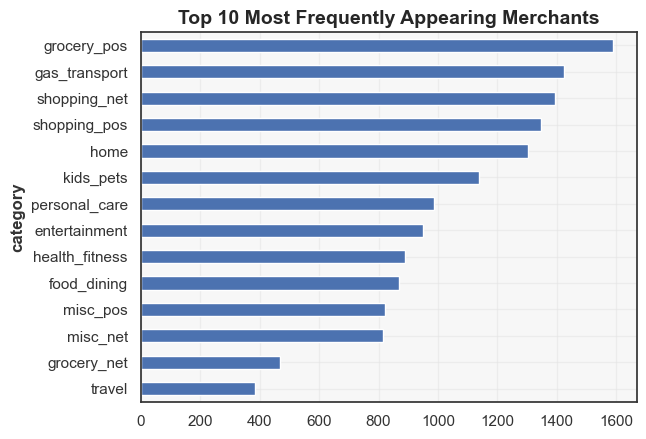

In [32]:
print(f'Number unique merchants: {data["merchant"].nunique()}')

data['category'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 Most Frequently Appearing Merchants")

<Axes: ylabel='state'>

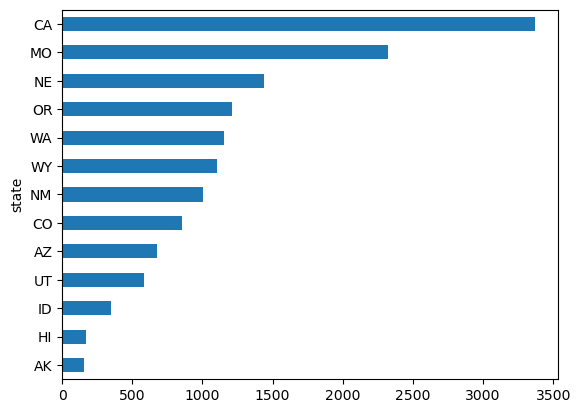

In [20]:
data['state'].value_counts().sort_values(ascending=True).plot(kind='barh')